###### To solve a puzzle, you are given an initial state and a goal state.
###### Target is to reach goal state from initial state using puzzle rules.
######  We can move blank tile only on left, right, up, and down
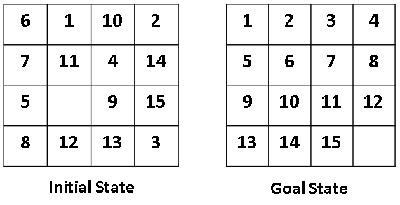

# Generate an intial state of NPuzzle

In [10]:
#adding support for large, multi-dimensional arrays and matrices,
#along with a large collection of high-level mathematical
#functions to operate on these arrays.
import numpy as np
import random
import math

In [14]:
def get_state():
      #random choice slects random item from the list
    n = random.choice([3,4,5]) #selects random number from 3-5 & assign it to the variable n
    #range() function generates a sequence of numbers, which is then converted to a list using the list() function.
    state = list(range(n**2)) #creates a list of numbers from 0 to n**2 - 1
    #random.shuffle() function is used to randomly reorder/shuffle the elements of a list.
    random.shuffle(state)
    #converts the state list to a NumPy array using the np.array() function.
    #then, it reshapes the array into a n by n matrix using the reshape() function. Finally, it prints this matrix.
    print(np.array(state).reshape(n,n))
    return state
st = get_state()
print(st)

[[ 4  1 13  9]
 [ 0  8  2 11]
 [10  5 14  3]
 [ 6 12 15  7]]
[4, 1, 13, 9, 0, 8, 2, 11, 10, 5, 14, 3, 6, 12, 15, 7]


In [15]:
def get_dim(state):
  #returns the square root of the length of state, converted to an integer
  return int(math.sqrt(len(state)))

get_dim(st)

4

# Calculate inversion

Inversion is a pair of tiles that are in the reverse order from where they ought to be. In our case, the bigger number is in front of the smaller one.



In [34]:
def get_invCount(state):
    count = 0
    for i in range(len(state)):
        for j in range(i+1,len(state)):
            if state[j]!=0 and state[i] > state[j]:
              count += 1
    return count

get_invCount(st)

40

In [17]:
st.index(0)

4

# **Find blank row**

In [21]:
# find row position of the blank tile
def get_blank_row(s):
    n = int(math.sqrt(len(s)))  # Get the dimension of the square
    for i in range(len(s)):
        if s[i] == 0:
            return i // n + 1  # Return the row position, rows start from 1




# Solvability Rules

In [29]:
# apply the rules to decide solvability
#  N, I, R
# define a method to return solvability (input S)
# return True if solvable or False if not
def isSolvable(state):
  N = get_dim(state)
  I = get_invCount(state)
  R = get_blank_row(state)

  # For a puzzle of odd size, it's solvable if the number of inversions is even
  if N % 2 == 1:
    return I % 2 == 0

  # For a puzzle of even size, it's solvable if the blank is on an even row counting from the bottom and number of inversions is odd
  # or the blank is on an odd row counting from the bottom and number of inversions is even
  else:
    return (R % 2 == 0 and I % 2 == 1) or (R % 2 == 1 and I % 2 == 0)


In [30]:
isSolvable(st)

False

In [33]:
s = get_state()
while(not isSolvable(s)):
  s = get_state()
print(s)


[[ 7  8  2  3]
 [ 0 10  1  9]
 [11  4  5 12]
 [15  6 13 14]]
[7, 8, 2, 3, 0, 10, 1, 9, 11, 4, 5, 12, 15, 6, 13, 14]
